### add primary imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

### read  data set file

In [2]:
data = pd.read_csv("MadaLine.csv")
data

,X1,X2,label
0,-0.642823,0.720606,0
1,-0.218126,0.677263,0
2,-0.582930,-0.347496,0
3,0.285127,0.091750,0
4,-0.335577,-0.313893,0
...,...,...,...
195,0.744066,-1.206548,1
196,-0.457547,1.286227,1
197,-1.020000,-0.783926,1
198,1.363429,-0.800250,1


## preprocessing
change label 0 to -1 For more explicit calculation

In [3]:
data = data.replace(0,-1)
data

,X1,X2,label
0,-0.642823,0.720606,-1
1,-0.218126,0.677263,-1
2,-0.582930,-0.347496,-1
3,0.285127,0.091750,-1
4,-0.335577,-0.313893,-1
...,...,...,...
195,0.744066,-1.206548,1
196,-0.457547,1.286227,1
197,-1.020000,-0.783926,1
198,1.363429,-0.800250,1


##### change data type

In [4]:
data = np.asarray(data)

feature_data = np.delete(data, 2, 1)
label_data = np.asarray(data[:,2])


print(feature_data[:10])
print(label_data[:10])

[[-0.64282255  0.72060647]
 [-0.21812607  0.67726261]
 [-0.58292983 -0.34749617]
 [ 0.28512668  0.09174997]
 [-0.33557667 -0.31389274]
 [ 0.31739521 -0.52331519]
 [-0.63941109 -0.17120822]
 [ 0.11580448  0.64575158]
 [ 0.18989616  0.89158849]
 [ 0.06790498 -0.60116898]]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


##### train and test split

In [5]:
from sklearn.model_selection import train_test_split

feature_data_train, feature_data_test, label_data_train, label_data_test = train_test_split( feature_data, label_data, test_size=0.2, random_state=4)
print ('Train set:', feature_data_train.shape,  label_data_train.shape)
print ('Test set:' , feature_data_test.shape,  label_data_test.shape)

Train set: (160, 2) (160,)
Test set: (40, 2) (40,)


### Scatter plot

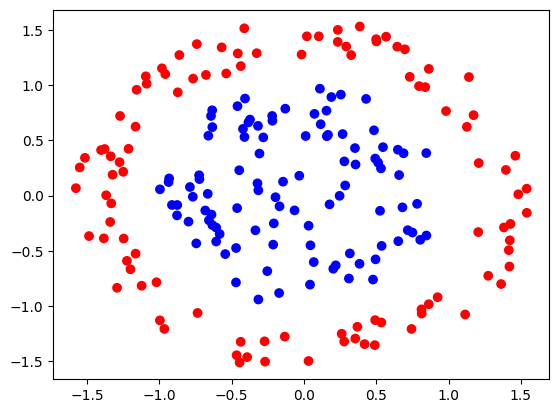

In [6]:
x = np.ravel(data[:, 0])
y = np.ravel(data[:, 1])
colors = np.ravel(data[:, 2])

plt.scatter(x, y, c=colors, cmap='bwr')
plt.show()

### Modeling

In [7]:
class Madaline:
    def __init__(self, lr, Number_of_neurons):
        self.lr = lr
        self.Number_of_neurons = Number_of_neurons  
        self.w = np.asarray([[0.001]*self.Number_of_neurons for _ in range(feature_data.shape[1])])         # random wights
        self.bias = [0.1]*self.Number_of_neurons+[0.5]                                                      # random bias (final neurons = 0.5)
        self.v = [1/self.Number_of_neurons]*self.Number_of_neurons                                          # All v's must be equal


    def fit(self, feature_data, label_data):
        epoch = 50
        for _ in range (epoch):                                                                             # Epoch  
            for q in range (feature_data.shape[0]):                                                         # Row   
                z_in = np.zeros(self.Number_of_neurons)  
                z    = np.zeros(self.Number_of_neurons)
                y = 0    
                for j in range (self.Number_of_neurons):
                    for i in range(feature_data.shape[1]): 
                        z_in[j] += feature_data[q,i]*self.w[i,j]
                    z_in[j] += self.bias[j] 
                    z[j] = witch_class(z_in[j])    
                    y += z[j]*self.v[j]
                y += self.bias[self.Number_of_neurons]   
                y = witch_class(y)
                          
                if y != label_data[q]:                                                                      # time for update wight an bias   
                    if label_data[q]==1 :                                                                   # We will do updating process on whose absolute value is less                                                                                                                 
                        min_index_z_in = np.argmin(np.abs(z_in))  
                        for i in range(feature_data.shape[1]):
                            self.w[i,min_index_z_in]  += self.lr*(1 - z_in[min_index_z_in])*feature_data[q,i]                   
                        self.bias[min_index_z_in] += self.lr*(1 - z_in[min_index_z_in])
                                
                    if label_data[q]==-1 :                                                                  # All those whose z are positive will be updated
                        n = 0
                        for z_in_value in z_in:            
                            if (z_in_value > 0):
                                for i in range(feature_data.shape[1]):
                                    self.w[i,n]  += self.lr*(-1 - z_in[i])*feature_data[q,i]                   
                                self.bias[n] += self.lr*(-1 - z_in[n])
                            n+=1
        
        
    def prediction(self, test_data):
        result = []
        for q in range (test_data.shape[0]):                                                         
            z_in = np.zeros(self.Number_of_neurons)  
            z    = np.zeros(self.Number_of_neurons)
            y = 0    
            for j in range (self.Number_of_neurons):
                for i in range(test_data.shape[1]): 
                    z_in[j] += test_data[q,i]*self.w[i,j]
                z_in[j] += self.bias[j]
                z[j] = witch_class(z_in[j])                
                y += z[j]*self.v[j]
            y += self.bias[self.Number_of_neurons]        
            y = witch_class(y)
            result.append(y)        
        return result        


    def plot_line(self, data):
        x = np.ravel(data[:, 0])
        y = np.ravel(data[:, 1])
        colors = np.ravel(data[:, 2])
        fig = plt.figure(figsize=(6.5, 10))  
        for i in range(self.Number_of_neurons):                                                              # Calculate the line equation: 0 = w0*x1 + w1*x2 + bias ---> x2 = (-(w0*x1) + (-bias+0.5)) / w1
            line_x = np.linspace(np.min(x), np.max(x), 100)
            line_y = -(self.w[0, i] / self.w[1, i]) * line_x - self.bias[i] / self.w[1, i]
            plt.plot(line_x, line_y, color='black', label='Line')  
        plt.scatter(x, y, c=colors, cmap='bwr')  
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()



def witch_class (x):
    if (x >= 0): x = 1      
    else: x = -1
    return x

### Testing on test data

In [8]:
madaline = Madaline(lr=0.05, Number_of_neurons=4)
madaline.fit(feature_data_train, label_data_train)


y_hat = madaline.prediction(feature_data_test)

### Show the dividing lines between two classes

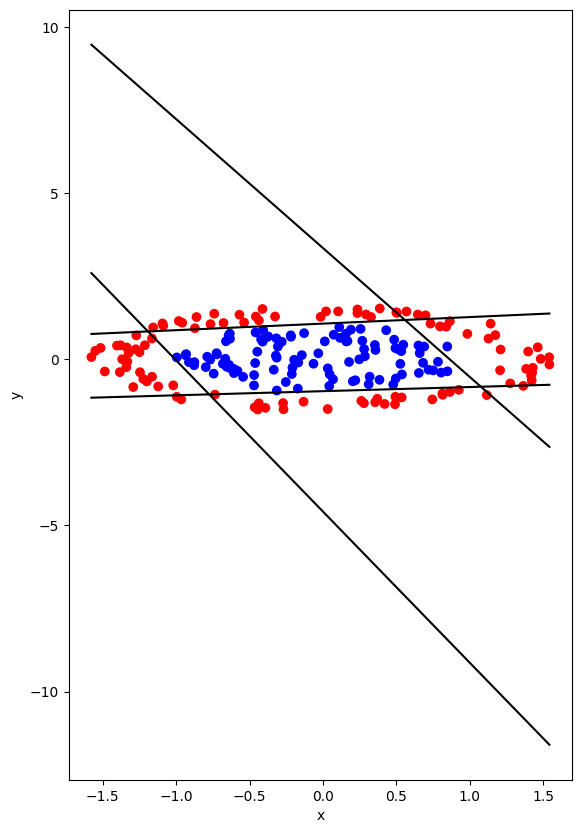

In [9]:
madaline.plot_line(data)

### Evaluation 

In [ ]:
from sklearn import metrics
score = metrics.accuracy_score(y_hat, label_data_test)
score

0.975